In [ ]:
!pip install -Uqq kaggle waterfallcharts treeinterpreter dtreeviz

     |████████████████████████████████| 61kB 2.8MB/s 


In [ ]:
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 6.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!python -m pip show scikit-learn  # to see which version and where scikit-learn is installed
# !python -m pip freeze  # to see all packages installed in the active virtualenv
!python -c "import sklearn; sklearn.show_versions()"

Name: scikit-learn
Version: 0.24.2
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, joblib, scipy, threadpoolctl
Required-by: yellowbrick, textgenrnn, sklearn, sklearn-pandas, mlxtend, lightgbm, librosa, imbalanced-learn, fancyimpute, dtreeviz

System:
    python: 3.7.10 (default, Feb 20 2021, 21:17:23)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
          pip: 19.3.1
   setuptools: 56.0.0
      sklearn: 0.24.2
        numpy: 1.19.5
        scipy: 1.4.1
       Cython: 0.29.22
       pandas: 1.1.5
   matplotlib: 3.2.2
       joblib: 1.0.1
threadpoolctl: 2.1.0

Built with OpenMP: True


In [ ]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype

from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG
import matplotlib.pyplot as plt
import xgboost as xgb

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

## Download Titanic data from Kaggle

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic'

/content/drive/MyDrive/Colab Notebooks/Kaggle/Titanic


In [ ]:
# !kaggle competitions download -c titanic
# !mv *.csv 'data'

In [ ]:
%ls -l data

total 92
-rw------- 1 root root  3258 Apr 29 19:16 gender_submission.csv
-rw------- 1 root root 28629 Apr 29 19:16 test.csv
-rw------- 1 root root 61194 Apr 29 19:16 train.csv


In [ ]:
df = pd.read_csv('data/train.csv', low_memory=False)
df

,PassengerId,Survived,Pclass,Name,...,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",...,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",...,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",...,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",...,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",...,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",...,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",...,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",...,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",...,111369,30.0000,C148,C


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.shape

(891, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## example of submission file

In [ ]:
# gender_submission = pd.read_csv("data/gender_submission.csv")
# gender_submission

In [ ]:
df.describe() # age has missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


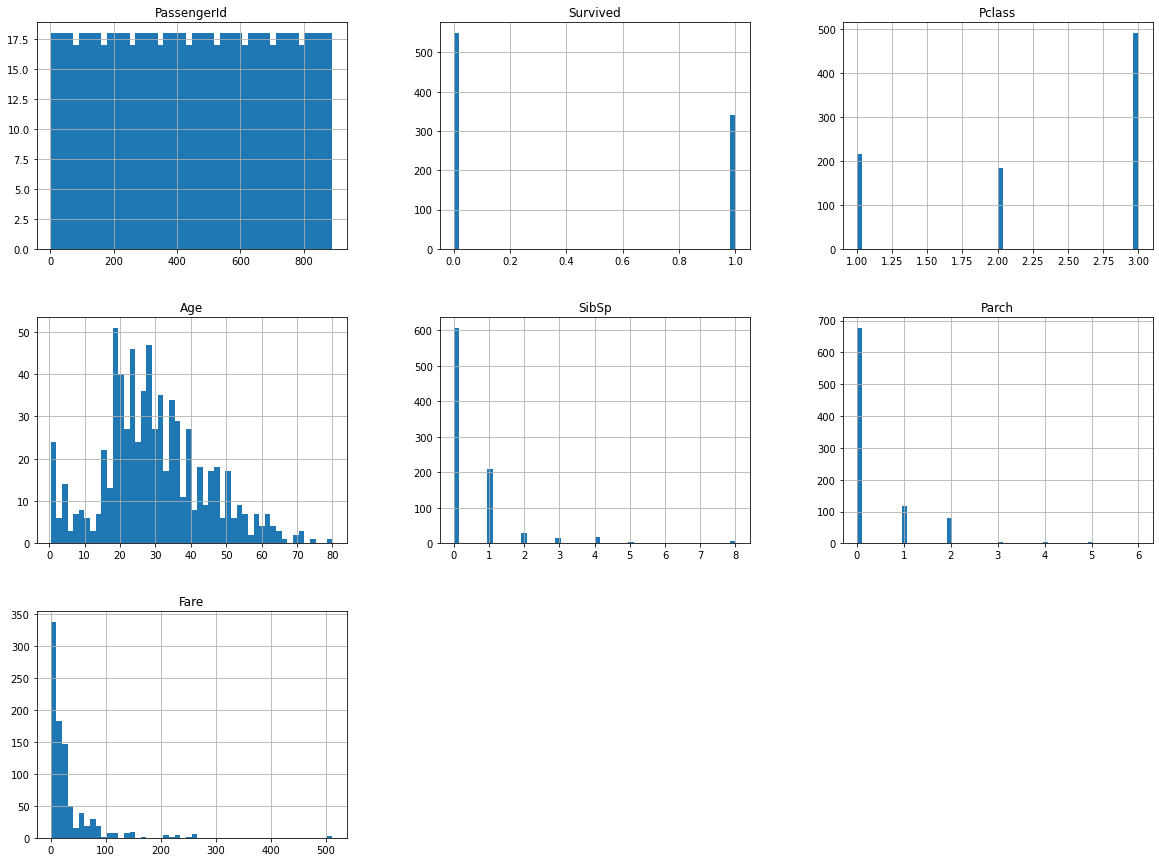

In [ ]:
df.hist(bins =50, figsize=(20,15))
plt.show()

In [ ]:
pd.crosstab(df["Survived"],df["Pclass"],margins=True)

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) #Provides train/val indices to split data in train/val sets
for train_index, val_index in split.split(df, df["Pclass"]):
    strat_train_set = df.loc[train_index]
    strat_val_set = df.loc[val_index]

In [ ]:
df["Pclass"].value_counts() / len(df),strat_train_set["Pclass"].value_counts() / len(strat_train_set),strat_val_set["Pclass"].value_counts() / len(strat_val_set)

(3    0.551066
 1    0.242424
 2    0.206510
 Name: Pclass, dtype: float64, 3    0.550562
 1    0.242978
 2    0.206461
 Name: Pclass, dtype: float64, 3    0.553073
 1    0.240223
 2    0.206704
 Name: Pclass, dtype: float64)

In [ ]:
df["Survived"].value_counts() / len(df) # pclass proportion in the full data

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [ ]:
strat_train_set["Survived"].value_counts() / len(strat_train_set),strat_val_set["Survived"].value_counts() / len(strat_val_set)

(0    0.606742
 1    0.393258
 Name: Survived, dtype: float64, 0    0.653631
 1    0.346369
 Name: Survived, dtype: float64)

### Check missingness

In [ ]:
strat_train_set.isnull().sum() #check missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            138
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          551
Embarked         2
dtype: int64

In [ ]:
x_train,y_train = strat_train_set.copy().drop("Survived",axis=1), strat_train_set["Survived"].copy()

In [ ]:
x_val, y_val = strat_val_set.copy().drop("Survived",axis=1), strat_val_set["Survived"].copy()

In [ ]:
x_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
x_val.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Plot learning curve


### Preprocessing pipeline

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
numeric_features = ["Age","Fare"]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())])

In [ ]:
categorical_features = ['Embarked', 'Sex', 'Pclass', 'SibSp', 'Parch']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

In [ ]:
preprocessor = ColumnTransformer( 
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
Lg_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [ ]:
Lg_clf.fit(x_train, y_train)
print("model score: %.3f" % Lg_clf.score(x_val, y_val))

model score: 0.788


In [ ]:
y_pred = Lg_clf.predict(x_val)
accuracy_score(y_val,y_pred)

0.7877094972067039

In [ ]:
test_df = pd.read_csv("data/test.csv",low_memory=False)
test_df

,PassengerId,Pclass,Name,Sex,...,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,...,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,...,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,...,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,...,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,...,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,...,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,...,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,...,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,...,359309,8.0500,NaN,S


In [ ]:
 test_df['Survived'] = Lg_clf.predict(test_df)

In [ ]:
from datetime import date
today = date.today().strftime("%b_%d_%Y")
today

'May_05_2021'

In [ ]:
test_df[['PassengerId','Survived']].to_csv("Titanic_Kaggle_logistic_"+today+".csv",index=False)


### Try XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Now we have a full prediction pipeline.
xgb_clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('xgbclf', xgb.XGBRFClassifier())])

In [ ]:
eval_set=[(x_val, y_val)]
scoring='accuracy'

In [ ]:
xgb_clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Embarked', 'Sex', 'Pclass',
                                                   'SibSp', 'Parch'])])),
                ('xgbclf', XGBRFClassifier())])

In [ ]:
param_grid = {
    "xgbclf__n_estimators": [5, 10, 50, 100, 500],
    "xgbclf__max_depth":[6,12,18,24,30],
    "xgbclf__colsample_bytree":[0.3,0.4,0.5],
    "xgbclf__learning_rate": [1e-5,1e-4,1e-3,0.01,0.1, 1],
    "xgbclf__alpha":[0.1,0.3,0.5,0.7,0.9,1],
    "xgbclf__lambda":[0.1,0.3,0.5,0.7,0.9,1]
}

In [ ]:
searchCV = GridSearchCV(xgb_clf, cv=5,  param_grid=param_grid, n_jobs=-1, scoring=scoring,return_train_score=True)
searchCV.fit(x_train, y_train)  

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Fare']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                              

In [ ]:
searchCV.best_params_ 

{'xgbclf__learning_rate': 1e-05, 'xgbclf__n_estimators': 50}

In [ ]:
mean_test_scores = searchCV.cv_results_["mean_test_score"]
std_test_scores = searchCV.cv_results_["std_test_score"]

In [ ]:
mean_train_scores = searchCV.cv_results_["mean_train_score"]
std_train_scores = searchCV.cv_results_["std_train_score"]

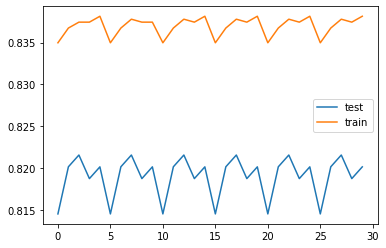

In [ ]:
plt.plot(mean_test_scores, label='test')
plt.plot(mean_train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [ ]:
print("model score: %.3f" % searchCV.score(x_val, y_val))

model score: 0.777


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.plot(figsize=(20, 15))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="orange")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="blue")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="orange",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="blue",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

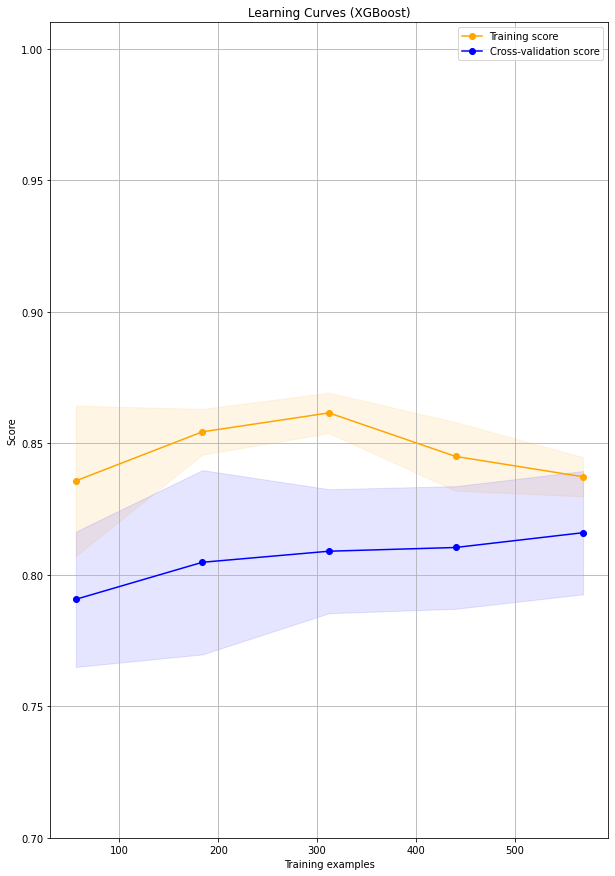

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(10, 15))

title = "Learning Curves (XGBoost)"
plot_learning_curve(searchCV, title, x_train, y_train, axes=axes, ylim=(0.7, 1.01),
                    cv=5, n_jobs=-1)
plt.show()

In [ ]:
test_df = pd.read_csv("data/test.csv",low_memory=False)


In [ ]:
final_model = searchCV.best_estimator_

In [ ]:
y_pred = final_model.predict(x_val)
accuracy_score(y_val,y_pred)

0.776536312849162

In [ ]:
test_df['Survived'] = final_model.predict(test_df)

In [ ]:
test_df[['PassengerId','Survived']].to_csv("Titanic_Kaggle_xgb_"+today+".csv",index=False)